In [4]:
import pandas as pd
import ast
import numpy as np
import os
from pathlib import Path

In [5]:
folders = [
   '../data/wmt21_train',  # 替换为你的第一个文件夹路径
   '../data/wmt22_fixed',  # 替换为你的第二个文件夹路径
   '../data/wmt23_train'   # 替换为你的第三个文件夹路径
]

In [6]:
def parse_list_column(series):
   """解析列表列并展平所有数值"""
   all_values = []
   for item in series.dropna():
       try:
           if isinstance(item, str):
               parsed_list = ast.literal_eval(item)
           else:
               parsed_list = item
           
           if isinstance(parsed_list, list):
               all_values.extend(parsed_list)
           else:
               all_values.append(parsed_list)
       except:
           continue
   return all_values

def analyze_column(values, column_name):
   """分析数值列表并返回统计信息"""
   if not values:
       return f"{column_name}: No valid data"
   
   return {
       'column': column_name,
       'count': len(values),
       'min': min(values),
       'max': max(values),
       'mean': np.mean(values),
       'std': np.std(values),
       'range': f"{min(values):.4f} to {max(values):.4f}"
   }

# 存储所有数据
all_scores = []
all_z_scores = []
all_z_means = []

# 遍历每个文件夹
for folder_idx, folder_path in enumerate(folders, 1):
   print(f"\n{'='*50}")
   print(f"Processing Folder {folder_idx}: {folder_path}")
   print(f"{'='*50}")
   
   if not os.path.exists(folder_path):
       print(f"Warning: Folder {folder_path} does not exist!")
       continue
   
   # 获取文件夹中所有TSV文件
   tsv_files = list(Path(folder_path).glob('*.tsv'))
   print(f"Found {len(tsv_files)} TSV files")
   
   folder_scores = []
   folder_z_scores = []
   folder_z_means = []
   
   # 处理每个TSV文件
   for file_path in tsv_files:
       try:
           print(f"\nProcessing: {file_path.name}")
           df = pd.read_csv(file_path, sep='\t')
           
           # 解析scores列
           if 'scores' in df.columns:
               scores = parse_list_column(df['scores'])
               folder_scores.extend(scores)
               print(f"  scores: {len(scores)} values")
           
           # 解析z_scores列
           if 'z_scores' in df.columns:
               z_scores = parse_list_column(df['z_scores'])
               folder_z_scores.extend(z_scores)
               print(f"  z_scores: {len(z_scores)} values")
           
           # 解析z_mean列
           if 'z_mean' in df.columns:
               z_means = df['z_mean'].dropna().tolist()
               folder_z_means.extend(z_means)
               print(f"  z_mean: {len(z_means)} values")
               
       except Exception as e:
           print(f"  Error processing {file_path.name}: {str(e)}")
   
   # 显示当前文件夹统计
   print(f"\n--- Folder {folder_idx} Summary ---")
   if folder_scores:
       stats = analyze_column(folder_scores, 'scores')
       print(f"Scores - Count: {stats['count']}, Range: {stats['range']}, Mean: {stats['mean']:.4f}")
   
   if folder_z_scores:
       stats = analyze_column(folder_z_scores, 'z_scores')
       print(f"Z_scores - Count: {stats['count']}, Range: {stats['range']}, Mean: {stats['mean']:.4f}")
   
   if folder_z_means:
       stats = analyze_column(folder_z_means, 'z_mean')
       print(f"Z_mean - Count: {stats['count']}, Range: {stats['range']}, Mean: {stats['mean']:.4f}")
   
   # 添加到总体数据
   all_scores.extend(folder_scores)
   all_z_scores.extend(folder_z_scores)
   all_z_means.extend(folder_z_means)

# 显示总体统计
print(f"\n{'='*60}")
print("OVERALL STATISTICS ACROSS ALL FOLDERS")
print(f"{'='*60}")

if all_scores:
   stats = analyze_column(all_scores, 'All Scores')
   print(f"\nAll Scores Combined:")
   print(f"  Total Count: {stats['count']:,}")
   print(f"  Range: {stats['range']}")
   print(f"  Mean: {stats['mean']:.4f}")
   print(f"  Std: {stats['std']:.4f}")

if all_z_scores:
   stats = analyze_column(all_z_scores, 'All Z_Scores')
   print(f"\nAll Z_Scores Combined:")
   print(f"  Total Count: {stats['count']:,}")
   print(f"  Range: {stats['range']}")
   print(f"  Mean: {stats['mean']:.4f}")
   print(f"  Std: {stats['std']:.4f}")

if all_z_means:
   stats = analyze_column(all_z_means, 'All Z_Means')
   print(f"\nAll Z_Means Combined:")
   print(f"  Total Count: {stats['count']:,}")
   print(f"  Range: {stats['range']}")
   print(f"  Mean: {stats['mean']:.4f}")
   print(f"  Std: {stats['std']:.4f}")

# 保存汇总数据（可选）
summary_data = {
   'all_scores': all_scores,
   'all_z_scores': all_z_scores,
   'all_z_means': all_z_means
}

print(f"\n--- Data Collection Complete ---")
print(f"Total files processed across all folders")
print(f"Use 'summary_data' dictionary to access combined data")


Processing Folder 1: ../data/wmt21_train
Found 7 TSV files

Processing: en-zh.tsv
  scores: 22347 values
  z_scores: 22347 values
  z_mean: 7000 values

Processing: et-en.tsv
  Error processing et-en.tsv: 'utf-8' codec can't decode byte 0x83 in position 10: invalid start byte

Processing: ru-en.tsv
  scores: 21000 values
  z_scores: 21000 values
  z_mean: 7000 values

Processing: en-de.tsv
  scores: 22779 values
  z_scores: 22779 values
  z_mean: 7000 values

Processing: ro-en.tsv
  scores: 21000 values
  z_scores: 21000 values
  z_mean: 7000 values

Processing: si-en.tsv
  scores: 21000 values
  z_scores: 21000 values
  z_mean: 7000 values

Processing: ne-en.tsv
  scores: 21000 values
  z_scores: 21000 values
  z_mean: 7000 values

--- Folder 1 Summary ---
Scores - Count: 129126, Range: 1.0000 to 100.0000, Mean: 63.6910
Z_scores - Count: 129126, Range: -10.2928 to 5.5224, Mean: -0.0021
Z_mean - Count: 42000, Range: -7.5419 to 3.1773, Mean: -0.0043

Processing Folder 2: ../data/wmt22_

In [7]:
folder_path = '../data/wmt22_fixed'

def find_outlier_scores(folder_path, threshold=100):
   """找出scores中大于阈值的异常值"""
   outliers = []
   
   if not os.path.exists(folder_path):
       print(f"Error: Folder {folder_path} does not exist!")
       return outliers
   
   # 获取文件夹中所有TSV文件
   tsv_files = list(Path(folder_path).glob('*.tsv'))
   print(f"Found {len(tsv_files)} TSV files in {folder_path}")
   
   for file_path in tsv_files:
       try:
           print(f"\nProcessing: {file_path.name}")
           df = pd.read_csv(file_path, sep='\t')
           
           if 'scores' not in df.columns:
               print(f"  Warning: 'scores' column not found in {file_path.name}")
               continue
           
           # 检查每一行的scores
           for row_idx, scores_data in enumerate(df['scores']):
               try:
                   # 解析scores列表
                   if pd.isna(scores_data):
                       continue
                       
                   if isinstance(scores_data, str):
                       scores_list = ast.literal_eval(scores_data)
                   else:
                       scores_list = scores_data
                   
                   if not isinstance(scores_list, list):
                       scores_list = [scores_list]
                   
                   # 检查每个score
                   for score_idx, score in enumerate(scores_list):
                       if score > threshold:
                           outlier_info = {
                               'file_name': file_path.name,
                               'row_index': row_idx,
                               'score_index_in_list': score_idx,
                               'outlier_score': score,
                               'full_scores_list': scores_list,
                               'list_length': len(scores_list)
                           }
                           outliers.append(outlier_info)
                           
               except Exception as e:
                   print(f"    Error parsing row {row_idx}: {str(e)}")
                   continue
           
           print(f"  Processed {len(df)} rows")
           
       except Exception as e:
           print(f"  Error processing {file_path.name}: {str(e)}")
   
   return outliers

# 执行异常值检测
print("Searching for scores > 100...")
outliers = find_outlier_scores(folder_path, threshold=100)

# 显示结果
print(f"\n{'='*60}")
print(f"OUTLIER DETECTION RESULTS")
print(f"{'='*60}")

if outliers:
   print(f"Found {len(outliers)} outlier scores > 100")
   
   # 按文件分组显示
   files_with_outliers = {}
   for outlier in outliers:
       file_name = outlier['file_name']
       if file_name not in files_with_outliers:
           files_with_outliers[file_name] = []
       files_with_outliers[file_name].append(outlier)
   
   for file_name, file_outliers in files_with_outliers.items():
       print(f"\n--- File: {file_name} ---")
       print(f"Outliers found: {len(file_outliers)}")
       
       for i, outlier in enumerate(file_outliers, 1):
           print(f"\n  Outlier #{i}:")
           print(f"    Row Index: {outlier['row_index']}")
           print(f"    Outlier Score: {outlier['outlier_score']}")
           print(f"    Position in list: {outlier['score_index_in_list']}")
           print(f"    Full scores list length: {outlier['list_length']}")
           print(f"    Full scores list: {outlier['full_scores_list']}")
   
   # 汇总统计
   print(f"\n{'='*60}")
   print("SUMMARY STATISTICS")
   print(f"{'='*60}")
   
   outlier_scores = [o['outlier_score'] for o in outliers]
   print(f"Total outlier scores: {len(outlier_scores)}")
   print(f"Min outlier score: {min(outlier_scores)}")
   print(f"Max outlier score: {max(outlier_scores)}")
   print(f"Mean outlier score: {sum(outlier_scores)/len(outlier_scores):.2f}")
   
   # 按文件统计
   print(f"\nOutliers per file:")
   for file_name, count in [(f, len(files_with_outliers[f])) for f in files_with_outliers]:
       print(f"  {file_name}: {count} outliers")

else:
   print("No outlier scores > 100 found!")

# 保存异常值信息供进一步分析
outliers_data = outliers
print(f"\nOutlier data saved in 'outliers_data' variable for further analysis")

Searching for scores > 100...
Found 8 TSV files in ../data/wmt22_fixed

Processing: en-mr.tsv
  Processed 26000 rows

Processing: en-zh.tsv
  Processed 7000 rows

Processing: et-en.tsv
  Processed 6996 rows

Processing: ru-en.tsv
  Processed 7000 rows

Processing: en-de.tsv
  Processed 6992 rows

Processing: ro-en.tsv
  Processed 6774 rows

Processing: si-en.tsv
  Processed 7000 rows

Processing: ne-en.tsv
  Processed 7000 rows

OUTLIER DETECTION RESULTS
Found 10 outlier scores > 100

--- File: en-mr.tsv ---
Outliers found: 10

  Outlier #1:
    Row Index: 905
    Outlier Score: 460
    Position in list: 0
    Full scores list length: 4
    Full scores list: [460, 74, 74, 94]

  Outlier #2:
    Row Index: 2682
    Outlier Score: 110
    Position in list: 1
    Full scores list length: 4
    Full scores list: [68, 110, 78, 77]

  Outlier #3:
    Row Index: 3443
    Outlier Score: 376
    Position in list: 1
    Full scores list length: 4
    Full scores list: [87, 376, 47, 78]

  Outlie

# Parse the range of z_mean

In [1]:
import numpy as np
import pandas as pd

In [2]:
filepath = "data/new_portion_processed/zmean_dataset.tsv"
df = pd.read_csv(filepath, sep='\t')['zmean'].tolist()

In [4]:
print(df[:30])

[0.243260898822813, 0.0821670833049519, 0.393324799090994, -0.280463570312933, -0.112016477961951, 0.0748138064718315, 0.411707991173795, -0.935868747634059, -0.0752500937963494, 0.393324799090994, 0.0748138064718315, 0.411707991173795, 0.0748138064718315, -0.280463570312933, -0.262080378230132, 0.411707991173795, 0.393324799090994, -0.262080378230132, -0.580591370849295, -0.262080378230132, -0.430527470581114, -0.935868747634059, 0.0931969985546324, 0.393324799090994, 0.0748138064718315, 0.748602175875759, 0.0454006991393502, 0.0748138064718315, -0.935868747634059, 0.0748138064718315]


In [5]:
zmean_array = np.array(df)

In [9]:
print(f"Total sample number: {len(zmean_array)}")
print(f"Min value: {zmean_array.min():.4f}")
print(f"Max value: {zmean_array.max():.4f}")
print(f"Mean: {zmean_array.mean():.4f}")
print(f"Median: {np.median(zmean_array):.4f}")
print(f"Standard Deviation: {zmean_array.std():.4f}")
print(f"25th percentile (Q1): {np.percentile(zmean_array, 25):.4f}")
print(f"75th percentile (Q3): {np.percentile(zmean_array, 75):.4f}")

Total sample number: 144762
Min value: -7.5419
Max value: 8.4543
Mean: -0.0016
Median: 0.1561
Standard Deviation: 0.8473
25th percentile (Q1): -0.4678
75th percentile (Q3): 0.5922


In [7]:
positive_scores = zmean_array[zmean_array > 0]
negative_scores = zmean_array[zmean_array < 0]
zero_scores = zmean_array[zmean_array == 0]

In [10]:
print(f"\n--- Score distribution ---")
print(f"Positive total: {len(positive_scores)} ({len(positive_scores)/len(zmean_array)*100:.2f}%)")
if len(positive_scores) > 0:
    print(f"  Positive mean: {positive_scores.mean():.4f}")
    print(f"  Positive range: [{positive_scores.min():.4f}, {positive_scores.max():.4f}]")
print(f"Negative total: {len(negative_scores)} ({len(negative_scores)/len(zmean_array)*100:.2f}%)")
if len(negative_scores) > 0:
    print(f"  Negative mean: {negative_scores.mean():.4f}")
    print(f"  Negative range: [{negative_scores.min():.4f}, {negative_scores.max():.4f}]")
print(f"Number of Zero: {len(zero_scores)} ({len(zero_scores)/len(zmean_array)*100:.2f}%)")


--- Score distribution ---
Positive total: 84322 (58.25%)
  Positive mean: 0.5620
  Positive range: [0.0000, 8.4543]
Negative total: 60440 (41.75%)
  Negative mean: -0.7879
  Negative range: [-7.5419, -0.0000]
Number of Zero: 0 (0.00%)


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

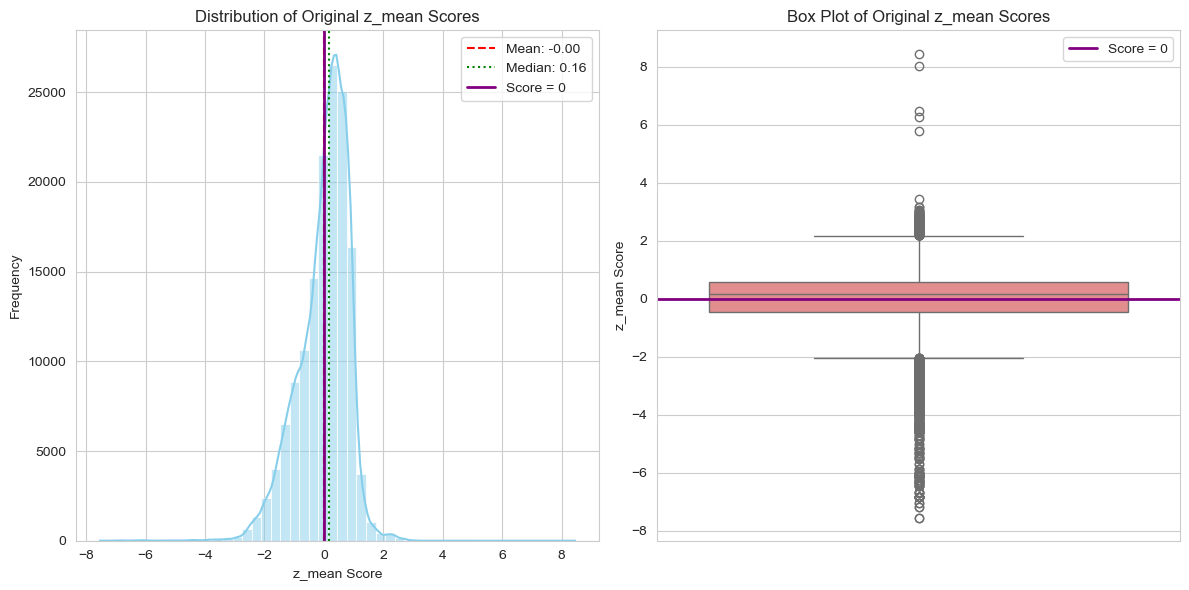

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(zmean_array, bins=50, kde=True, color='skyblue')
plt.axvline(x=zmean_array.mean(), color='red', linestyle='--', label=f'Mean: {zmean_array.mean():.2f}')
plt.axvline(x=np.median(zmean_array), color='green', linestyle=':', label=f'Median: {np.median(zmean_array):.2f}')
plt.axvline(x=0, color='purple', linestyle='-', linewidth=2, label='Score = 0') # 突出0点
plt.title('Distribution of Original z_mean Scores')
plt.xlabel('z_mean Score')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=zmean_array, color='lightcoral')
plt.axhline(y=0, color='purple', linestyle='-', linewidth=2, label='Score = 0') # 突出0点
plt.title('Box Plot of Original z_mean Scores')
plt.ylabel('z_mean Score')
plt.legend()

plt.tight_layout()
plt.show()

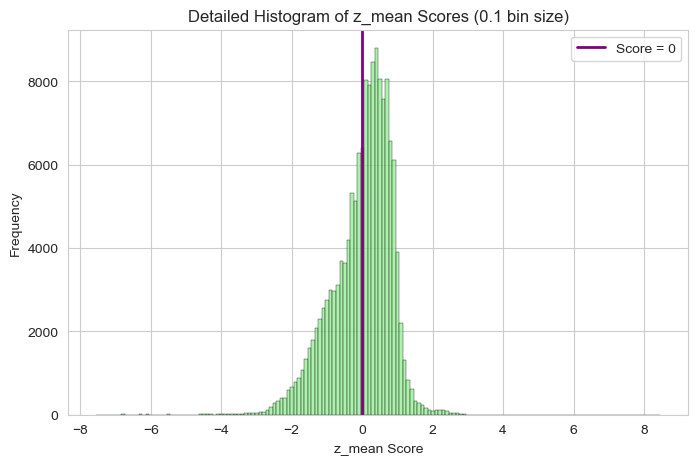

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(zmean_array, bins=np.arange(zmean_array.min(), zmean_array.max() + 0.1, 0.1), kde=False, color='lightgreen', edgecolor='black')
plt.axvline(x=0, color='purple', linestyle='-', linewidth=2, label='Score = 0')
plt.title('Detailed Histogram of z_mean Scores (0.1 bin size)')
plt.xlabel('z_mean Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
TRAIN_FILE = "data/new_portion_processed/zmean_train_80.tsv"

def load_tsv_data_simple(file_path):
    """
    加载TSV数据并提取原始 zmean 分数。
    简化版，仅用于获取原始分数，不包含PromptEnhancedDataset的复杂逻辑。
    """
    try:
        # 你的TSV文件加载逻辑（处理编码）
        if 'train' in file_path.lower():
            encoding = 'latin-1'
        else:
            encoding = 'utf-8' # Fallback for dev/test if this function were used for them

        try:
            df = pd.read_csv(file_path, sep='\t', encoding=encoding)
        except UnicodeDecodeError:
            fallback_encoding = 'utf-8' if encoding == 'latin-1' else 'latin-1'
            df = pd.read_csv(file_path, sep='\t', encoding=fallback_encoding)

        # 假设 'zmean' 列是目标分数
        if 'zmean' in df.columns:
            targets = df['zmean'].astype(float).tolist()
        else:
            # 如果没有'zmean'列，假设最后一列是目标分数
            print(f"Warning: 'zmean' column not found in {file_path}. Assuming last column as target.")
            targets = df.iloc[:, -1].astype(float).tolist()

        return targets

    except Exception as e:
        print(f"Failed to load data from {file_path}: {e}")
        raise

In [17]:
print(f"Loading train file: {TRAIN_FILE}")
train_zmean_original = load_tsv_data_simple(TRAIN_FILE)
train_zmean_array = np.array(train_zmean_original).reshape(-1, 1)

print(f"Training set zmean sample total: {len(train_zmean_original)}")
print(f"Training set zmean range: [{train_zmean_array.min():.4f}, {train_zmean_array.max():.4f}]")
print(f"Training set zmean mean: {train_zmean_array.mean():.4f}")
print(f"Training set zmean std: {train_zmean_array.std():.4f}")


Loading train file: data/new_portion_processed/zmean_train_80.tsv
Training set zmean sample total: 115809
Training set zmean range: [-7.5419, 8.4543]
Training set zmean mean: -0.0022
Training set zmean std: 0.8474


In [18]:
scaler = StandardScaler()

print("\nFitting StandardScaler and transforming the training set...")
train_zmean_normalized = scaler.fit_transform(train_zmean_array).flatten().tolist()

norm_mean = np.mean(train_zmean_normalized)
norm_std = np.std(train_zmean_normalized)
norm_min = np.min(train_zmean_normalized)
norm_max = np.max(train_zmean_normalized)

print(f"Normalized training set zmean total: {len(train_zmean_normalized)}")
print(f"Normalized training set zmean range: [{norm_min:.4f}, {norm_max:.4f}]")
print(f"Normalized training set zmean mean: {norm_mean:.4f}")
print(f"Normalized training set zmean std: {norm_std:.4f}")


Fitting StandardScaler and transforming the training set...
Normalized training set zmean total: 115809
Normalized training set zmean range: [-8.8971, 9.9788]
Normalized training set zmean mean: -0.0000
Normalized training set zmean std: 1.0000


In [21]:
from sklearn.preprocessing import MinMaxScaler
import os

In [22]:
data_dir = "data/new_portion_processed"

train_file = os.path.join(data_dir, "zmean_train_80.tsv")
dev_file = os.path.join(data_dir, "zmean_dev_10.tsv")
test_file = os.path.join(data_dir, "zmean_test_10.tsv")

toy_train_file = os.path.join(data_dir, "toy_train.tsv")
toy_dev_file = os.path.join(data_dir, "toy_dev.tsv")
toy_test_file = os.path.join(data_dir, "toy_test.tsv")


In [23]:
train_df = pd.read_csv(train_file, sep="\t")
dev_df = pd.read_csv(dev_file, sep="\t")
test_df = pd.read_csv(test_file, sep="\t")

toy_train = train_df.head(1000)
toy_dev = dev_df.head(125)
toy_test = test_df.head(125)

toy_train.to_csv(toy_train_file, sep="\t", index=False)
toy_dev.to_csv(toy_dev_file, sep="\t", index=False)
toy_test.to_csv(toy_test_file, sep="\t", index=False)
